# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC

%matplotlib inline


# Loading Data

In [3]:
df = pd.read_csv('QData_set_S128.csv', header=0, index_col=0)
df


,H,CNOT,Rx,Ry,Rz,X,Y,Z,CZ,CU1/CP,...,S,Sdag,U3,Depth,Qubits,Error Dist,Error(MAE),Unnamed: 22,Unnamed: 23,Unnamed: 24
Name,,,,,,,,,,,,,,,,,,,,,
Teleportation_1,4,2,0,0,0,0,0,0,0,0,...,1,0,0,6,3,17.67840,2.20980,NaN,NaN,NaN
Toffoli,2,6,0,0,0,2,0,0,0,0,...,1,0,0,13,3,96.87500,96.87500,NaN,NaN,NaN
VQE_4,8,16,0,0,28,2,0,0,0,0,...,0,0,0,34,4,32.80840,8.20210,NaN,NaN,NaN
Vari_uccsd4,56,88,0,0,20,0,56,0,0,0,...,0,0,0,148,4,79.68880,9.96110,NaN,NaN,NaN
w_state,3,3,0,0,0,3,0,0,0,0,...,2,1,1,14,3,34.36200,11.45400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tof_dob,0,4,0,4,0,0,0,0,0,2,...,0,0,0,8,4,62.50000,62.50000,NaN,NaN,NaN
Peres_8,0,1,0,2,0,0,0,0,0,1,...,0,0,0,3,3,17.96875,17.96875,NaN,NaN,NaN
peres_8_LP,0,3,0,2,3,0,0,0,0,0,...,0,0,0,6,3,25.78125,25.78125,NaN,NaN,NaN


In [4]:
x = df[['H', 'CNOT', 'Rx', 'Ry', 'Rz', 'X', 'Y', 'Z', 'CZ', 'CU1/CP','T', 'Toffoli', 'SWAP', 'Tdag', 'S', 'Sdag', 'U3', 'Depth', 'Qubits',]]

In [5]:
y = df[['Error(MAE) ']]

# Splitting Data into Train and Test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=150)


# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(positive=True)
lm.fit(x_train, y_train)

LinearRegression(positive=True)

In [9]:
print(lm.intercept_)

[3.35484962]


In [10]:
predictions = lm.predict(x_test)

# Results of Linear Regression

In [12]:
from sklearn import metrics

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Coefficient of determination: %.4f' %metrics.r2_score(y_test, predictions))

MAE: 26.405440322603624
MSE: 999.5104180192618
RMSE: 31.61503468318929
Coefficient of determination: 0.1801


# Support Vector Regression

In [15]:
from sklearn.svm import SVR

# SVM model
# gamma=0.00455, C=24750 for 25% train-test split
clf = SVR(kernel='rbf',gamma=0.00455, C=23750)
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)


/home/saikat/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Results of SVR

In [16]:
#Calculate r2 score
r2=metrics.r2_score(y_test, y_pred)
#calculate adjusted r2 score
adj_r2 = (1 - (1 - r2) * ((x_train.shape[0] - 1) / 
          (x_train.shape[0] - x_train.shape[1] - 1)))

print('SVM MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('SVM MSE:', metrics.mean_squared_error(y_test, y_pred))
print('SVM RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.2f' %r2)
print('Adjusted R2 score: %.2f' %adj_r2)

SVM MAE:  8.426697322006978
SVM MSE: 101.5932091588807
SVM RMSE:  10.079345671167385
Coefficient of determination: 0.92
Adjusted R2 score: 0.88


In [26]:
#Predicting error for a random circuit out side the data set
x_try=np.array([[2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3]])
y_pred_try=clf.predict(x_try)
y_pred_try

array([35.2161292])

# Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 50, random_state = 5)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  
yrf_pred = regressor.predict(x_test)
print('SVM MAE: ', metrics.mean_absolute_error(y_test, yrf_pred))
print('SVM MSE:', metrics.mean_squared_error(y_test, yrf_pred))
print('SVM RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yrf_pred)))
RFr2=metrics.r2_score(y_test, yrf_pred)
print('Coefficient of determination: %.2f' %RFr2)

SVM MAE:  18.19762385155555
SVM MSE: 560.4425837704324
SVM RMSE:  23.67366857439785
Coefficient of determination: 0.54


<ipython-input-20-8ac3deeb03d0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


# Lasso Regression

In [55]:
lasso = Lasso(alpha=1).fit(x_train, y_train) #Using default alpha=1
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/home/saikat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5981.933395072883, tolerance: 8.57827772034686
  model = cd_fast.enet_coordinate_descent(


Best Score:  0.06874615114133797
Best Params:  {'alpha': 10}


In [56]:
lassoPred=lasso.predict(x_test)
print('SVM MAE: ', metrics.mean_absolute_error(y_test, lassoPred))
print('SVM MSE:', metrics.mean_squared_error(y_test, lassoPred))
print('SVM RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, lassoPred)))
LSr2=metrics.r2_score(y_test, lassoPred)
print('Coefficient of determination: %.2f' %LSr2)

SVM MAE:  24.955933579720472
SVM MSE: 842.9325705312411
SVM RMSE:  29.033301061561037
Coefficient of determination: 0.31


# Performance measure of the models

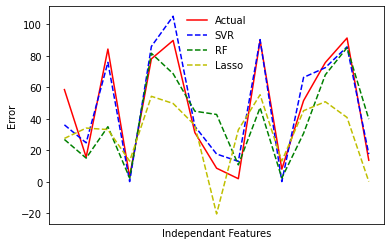

<Figure size 7200x7200 with 0 Axes>

In [59]:
mydict = {}
mydict={'Actual':[y_test,'r'],'SVR':[y_pred,'b--'], 'RF':[yrf_pred,'g--'], 'Lasso':[lassoPred,'y--'] }
for i in mydict:
    plt.plot(mydict[i][0], mydict[i][1], label=i)
    plt.xlabel('Independant Features')
    plt.ylabel('Error')
    plt.legend(loc=0, frameon=False)
    plt.xticks(np.arange(10,10,10))
plt.figure(figsize=(100,100))
plt.show();

# Comparison of RMSE

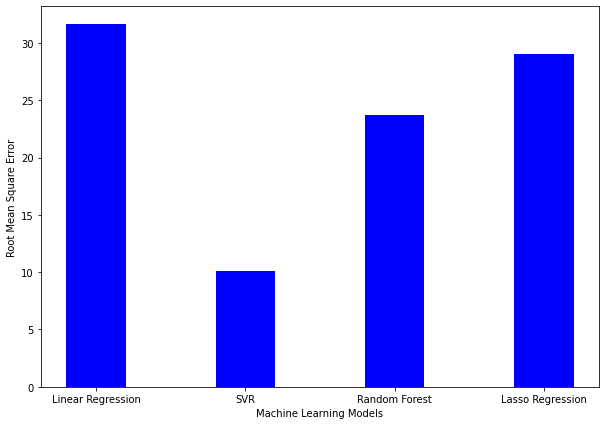

In [23]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Linear Regression':31.61503468318929, 'SVR':10.079345671167385, 'Random Forest':23.67366857439785,
        'Lasso Regression':29.033301061561037}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 7))
 
# creating the bar plot
plt.bar(courses, values, color ='Blue',
        width = 0.4)
 
plt.xlabel("Machine Learning Models")
plt.ylabel("Root Mean Square Error")
#plt.title("Students enrolled in different courses")
plt.show()

# Comparison of R2 Score

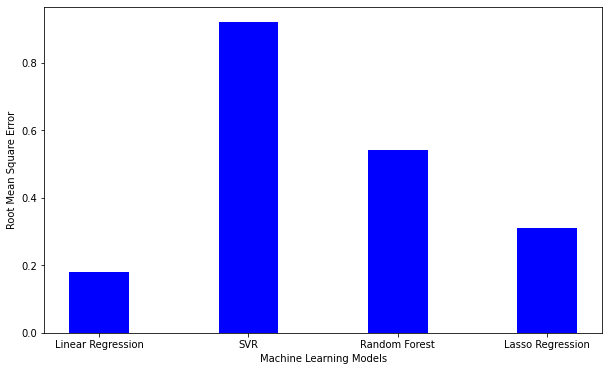

In [25]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Linear Regression':0.18, 'SVR':0.92, 'Random Forest':0.54,
        'Lasso Regression':0.31}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
 
# creating the bar plot
plt.bar(courses, values, color ='Blue',
        width = 0.4)
 
plt.xlabel("Machine Learning Models")
plt.ylabel("Root Mean Square Error")
#plt.title("Students enrolled in different courses")
plt.show()